## <center>Imports</center>

In [1]:
# Linear Algebra, Data Manipulation
import numpy as np
import pandas as pd

# Plots
import seaborn as sns
pal_hls = sns.hls_palette(100, l=.3, s=.8).as_hex() # Seaborn Color Palette for colors
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

# Interactive Plots
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# <center>1. Game Data</center>
### <b>Game Data:</b> The <i>games.csv</i> contains the teams playing in each game. The key variable is gameId

In [2]:
games = pd.read_csv("./datasets/games.csv")
games

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN
...,...,...,...,...,...,...,...
759,2021010311,2020,17,01/03/2021,16:25:00,DEN,LV
760,2021010312,2020,17,01/03/2021,16:25:00,HOU,TEN
761,2021010313,2020,17,01/03/2021,16:25:00,IND,JAX
762,2021010314,2020,17,01/03/2021,16:25:00,LA,ARI


### Make Derative Features (month, day, hour)

In [3]:
games["month"] = games["gameDate"].apply(lambda x: int(x.split("/")[0]))
games["day"] = games["gameDate"].apply(lambda x: int(x.split("/")[1]))
games["hour"] = games["gameTimeEastern"].apply(lambda x: int(x.split(":")[0]))

### Data Visualization

In [4]:
def plotlybar(data, column, title):
    df = pd.DataFrame()

    df[column] = data[column].value_counts().index # Gets all the unique seasons
    df["gamesCount"] = data[column].value_counts().values # Gets the gamesCount for those unique seasons
    df["percent"] = round(df.gamesCount / len(data) * 100, 1) # The Percent of games played that season

    # Bar plot using plotly bar plot
    fig = px.bar(df, 
                y='gamesCount',
                x=column,
                text='percent',
                height=600, width=950,
                title=f"<b>{title}</b>", color=pal_hls[:len(df)])
    fig.update_traces(texttemplate='%{text}%', textposition='outside') # The text at the top of the bar plot
    fig.update_layout(
        xaxis = dict(dtick = 1),
        showlegend=False) # Fixing the problem with the x ticks here
    fig.show()

In [5]:
plotlybar(games, "season", "Number of Games Played Every Season")

#### As the Years Pass the Number of Games Held Every Year/Season Increased

In [6]:
plotlybar(games, "month", "Number of Games Played Every Month")

#### The Games were held from Sepetember to January. There are especially many games held in December, and rarely any games held in January

In [7]:
plotlybar(games, "day", "Number of Games Held Every Day")

#### Very few Games were Held on 5, 12, 19, 26 and 31 day of the months.

In [8]:
plotlybar(games, "gameTimeEastern", "Number of Games played on different gameTimeEastern")

#### Most of the Games were Held at 13, 16:25, 20:20, 16:05 and 20:15 gameTime Eastern

In [9]:
plotlybar(games, "hour", "Number of Games played on different gameTimeEastern(ignoring minutes)")

#### This gives us a better representation and tells us that most of the games started at 13, 16 and 20 hours.

In [10]:
plotlybar(games, "week", "Number of Games Held Every week")

# <center>2. Player Data</center>
### <b>Player Data:</b> The <i>players.csv</i> contains player-level information from players that pariticipated in any of the tracking data files. The key variable is nflId

In [11]:
players = pd.read_csv('./datasets/players.csv')
players

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


### Convert Height to Centimeters and Weight to Kilograms

In [12]:
players_heights = players["height"] # Get the Height data from DataFrame
players_heights = players_heights.apply(lambda x: x.split("-")) # Split the heights by hyphen ("-")

# Convert Heights to Centimeters and add them to DataFrame
players["height"] = players_heights.apply(lambda x: int(x[0]) * 12 + int(x[1]) if len(x) == 2 else int(x[0])) * 2.54

# Convert Weights to Kilograms and them to DataFrame
players["weight"] = round(players.weight * 0.453592, 2)

players

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,185.42,94.35,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,182.88,99.79,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,182.88,92.99,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,185.42,106.59,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,185.42,107.05,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,190.50,145.15,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,190.50,120.20,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,175.26,89.81,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,185.42,104.33,1992-10-20,LSU,RB,Jeremy Hill


### Get Birth Year and Birth Month from the birthDate

In [13]:
players["birthYear"] = 0
players["birthMonth"] = 0

In [14]:
#There are NA values in birthDate so that we should drop them
players.dropna(subset=["birthDate"], inplace=True)

In [15]:
for idx, row in players.iterrows():
    if len(row['birthDate'].split('/')) == 3: # 05/17/1994 
        players.loc[idx, 'birthYear'] = row['birthDate'].split('/')[2]
        players.loc[idx, 'birthMonth'] = row['birthDate'].split('/')[0]
        
    elif len(row['birthDate'].split('-')) == 3: # 1995-05-05
        players.loc[idx, 'birthYear'] = row['birthDate'].split('-')[0]
        players.loc[idx, 'birthMonth'] = row['birthDate'].split('-')[1]

In [16]:
players

,nflId,height,weight,birthDate,collegeName,Position,displayName,birthYear,birthMonth
0,42901,185.42,94.35,1992-07-25,James Madison,SS,Dean Marlowe,1992,07
1,43501,182.88,99.79,1994-08-11,Central Michigan,FS,Kavon Frazier,1994,08
2,43534,182.88,92.99,1993-06-02,Illinois,SS,Clayton Fejedelem,1993,06
3,43535,185.42,106.59,1992-12-22,Temple,MLB,Tyler Matakevich,1992,12
4,44174,185.42,107.05,1993-02-22,Texas Tech,ILB,Sam Eguavoen,1993,02
...,...,...,...,...,...,...,...,...,...
2727,33216,190.50,145.15,06/16/1986,Central Florida,G,Josh Sitton,1986,06
2728,33184,190.50,120.20,05/02/1985,Winston-Salem State,DE,William Hayes,1985,05
2729,45651,175.26,89.81,06/16/1993,Iowa,WR,Riley McCarron,1993,06
2730,41284,185.42,104.33,1992-10-20,LSU,RB,Jeremy Hill,1992,10


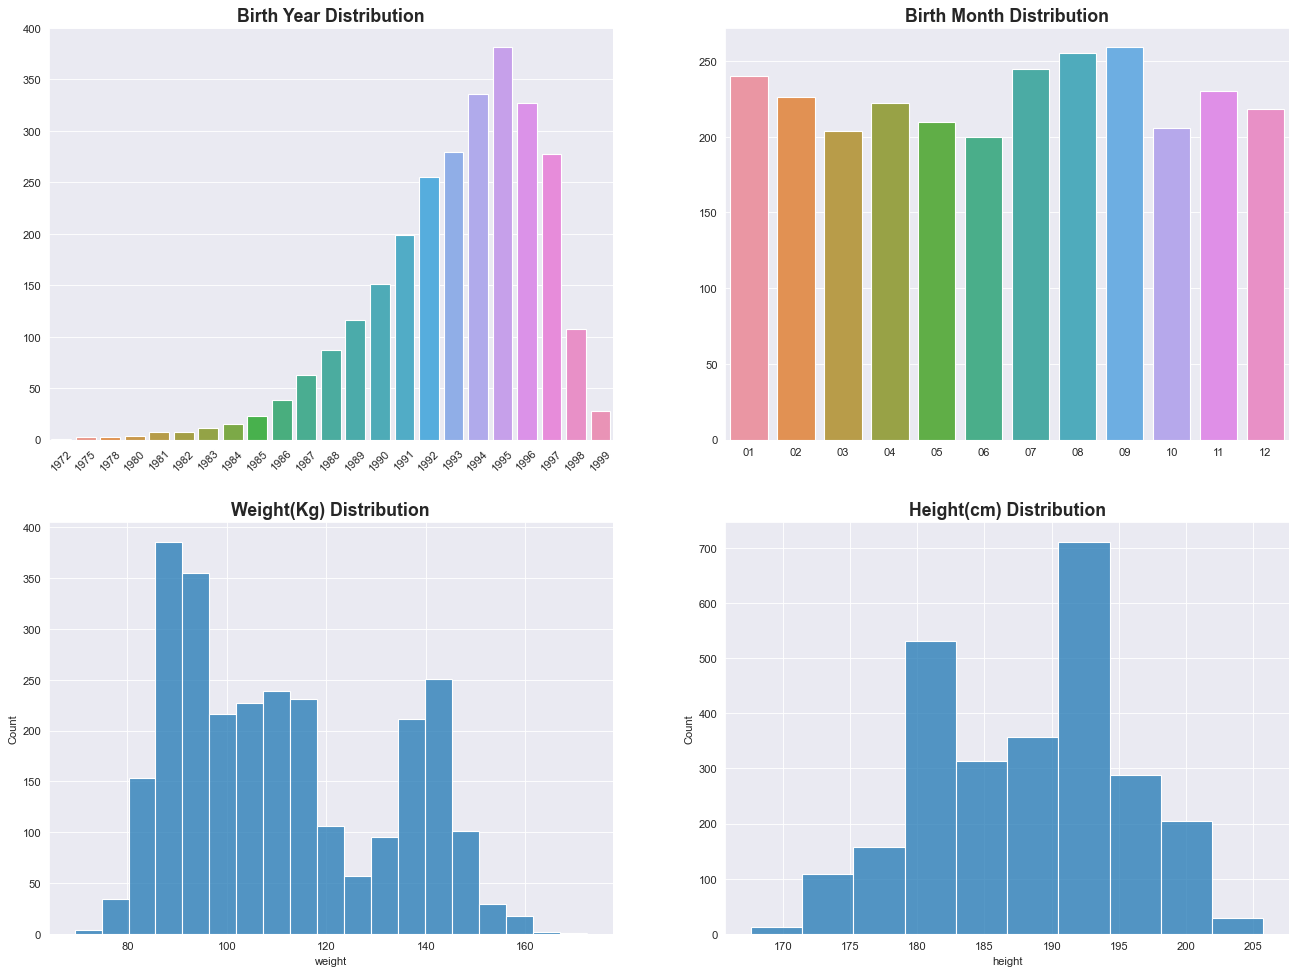

In [17]:
fig = plt.figure(figsize=(20, 15), dpi=80)
title_font_dict = {"fontsize": 16, "fontweight": "bold"}

birth_year_dist = players.birthYear.value_counts().sort_index()
ax1 = fig.add_subplot(221)
sns.barplot(x=birth_year_dist.index, y=birth_year_dist.values, ax=ax1)
ax1.tick_params(axis='x', rotation=45)
ax1.set_title("Birth Year Distribution", fontdict=title_font_dict)

birth_month_dist = players.birthMonth.value_counts().sort_index()
ax2 = fig.add_subplot(222)
sns.barplot(x=birth_month_dist.index, y=birth_month_dist.values, ax=ax2)
ax2.set_title("Birth Month Distribution", fontdict=title_font_dict)

ax3 = fig.add_subplot(223)
sns.histplot(players.weight, ax=ax3)
ax3.set_title("Weight(Kg) Distribution", fontdict=title_font_dict)

ax4 = fig.add_subplot(224)
sns.histplot(players.height, ax=ax4, bins=10)
ax4.set_title("Height(cm) Distribution", fontdict=title_font_dict);

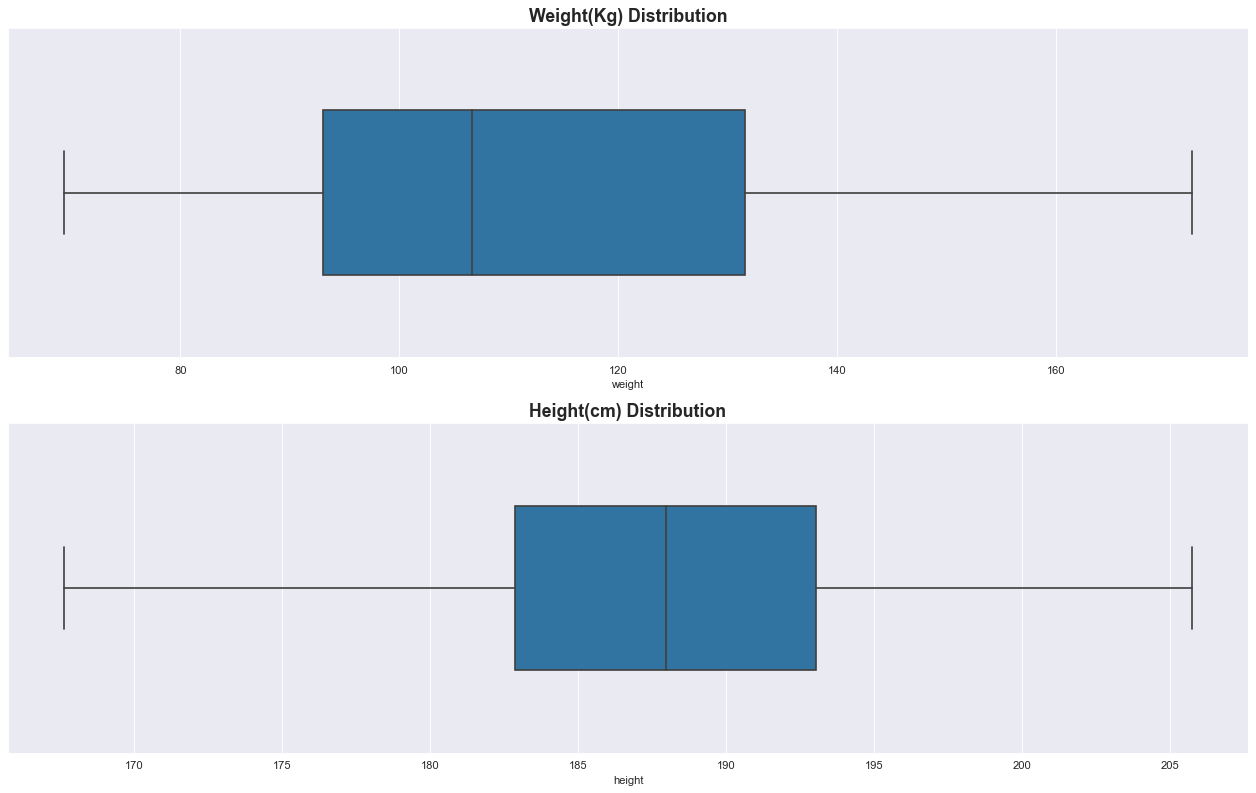

In [18]:
fig = plt.figure(figsize=(20, 12), dpi=80)
title_font_dict = {"fontsize": 16, "fontweight": "bold"}

ax1 = fig.add_subplot(211)
sns.boxplot(players.weight, ax=ax1, width=0.5)
ax1.set_title("Weight(Kg) Distribution", fontdict=title_font_dict)

ax2 = fig.add_subplot(212)
sns.boxplot(players.height, ax=ax2, width=0.5)
ax2.set_title("Height(cm) Distribution", fontdict=title_font_dict);

#### Most of the Players are Born between 1991 and 1997
#### Most of the Players weight between 80 to 120 kgs
#### Most of the players have the height between 185cm to 195cm

In [19]:
print(f"Youngest Player Born in: {players.birthYear.max()}")
print(f"Oldest Player Born in: {players.birthYear.min()}")

Youngest Player Born in: 1999
Oldest Player Born in: 1972


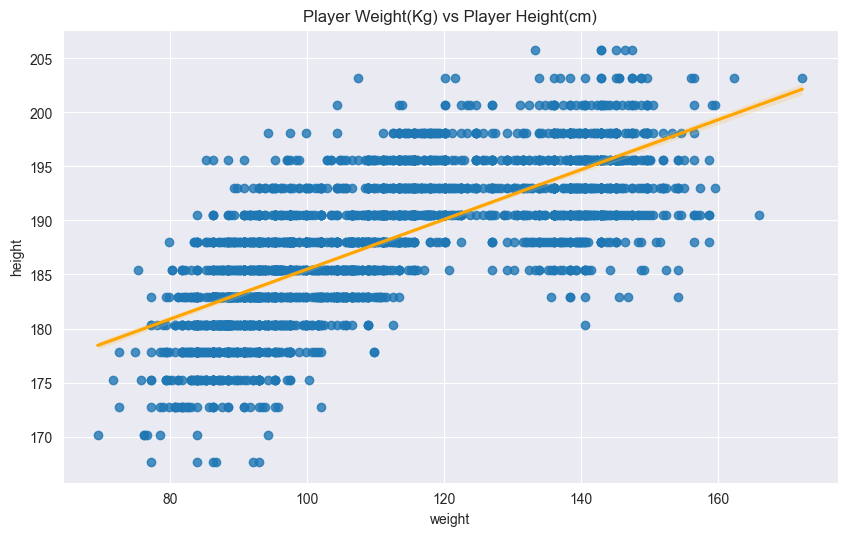

In [20]:
plt.figure(figsize=(10, 6), dpi=100)
sns.regplot(x=players.weight, y=players.height, line_kws={"color": "orange"})
plt.title("Player Weight(Kg) vs Player Height(cm)");

#### It seems that players with higher weight tend to be longer and vice versa is also possible

In [21]:
# Seeing Which college has given the most number of players

college_count = players.collegeName.value_counts()[:25]

fig = px.bar(x=college_count.index, y=college_count.values,
             labels={"x":"College Name", "y":"Count"}, title="<b>Players College Count</b>")
fig.update_layout(
  width=1300,
  height=500,
)
fig.show()

#### Alabama College has given the most number of Players

In [22]:
position_count = players.Position.value_counts()

fig = px.bar(x=position_count.index, y=position_count.values,
             labels={"x":"Position", "y":"Count"}, title="<b>Players Position Count</b>")
fig.update_layout(
  width=1300,
  height=500,
)
fig.show()

#### Highest Number of Players play at WR Positon and very few Players play at HB Position

# <center>3. Play Data</center>
### <b>Play Data:</b> The <i>plays.csv</i> file contains play-level information from each game. The key variable are gameId and playId

In [23]:
plays = pd.read_csv("./datasets/plays.csv")
plays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19974,2021010315,3683,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,...,NaN,NaN,NaN,16,19,NaN,75.0,NaN,40,75
19975,2021010315,3870,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,0,0,SEA,Extra Point,Kick Attempt Good,41175.0,...,NaN,NaN,NaN,16,25,NaN,NaN,NaN,0,25
19976,2021010315,3886,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,...,NaN,NaN,NaN,16,26,NaN,75.0,NaN,40,75
19977,2021010315,4166,"T.Vizcaino extra point is GOOD, Center-C.Holba...",4,0,0,SF,Extra Point,Kick Attempt Good,47590.0,...,NaN,NaN,NaN,22,26,NaN,NaN,NaN,0,95


<AxesSubplot:>

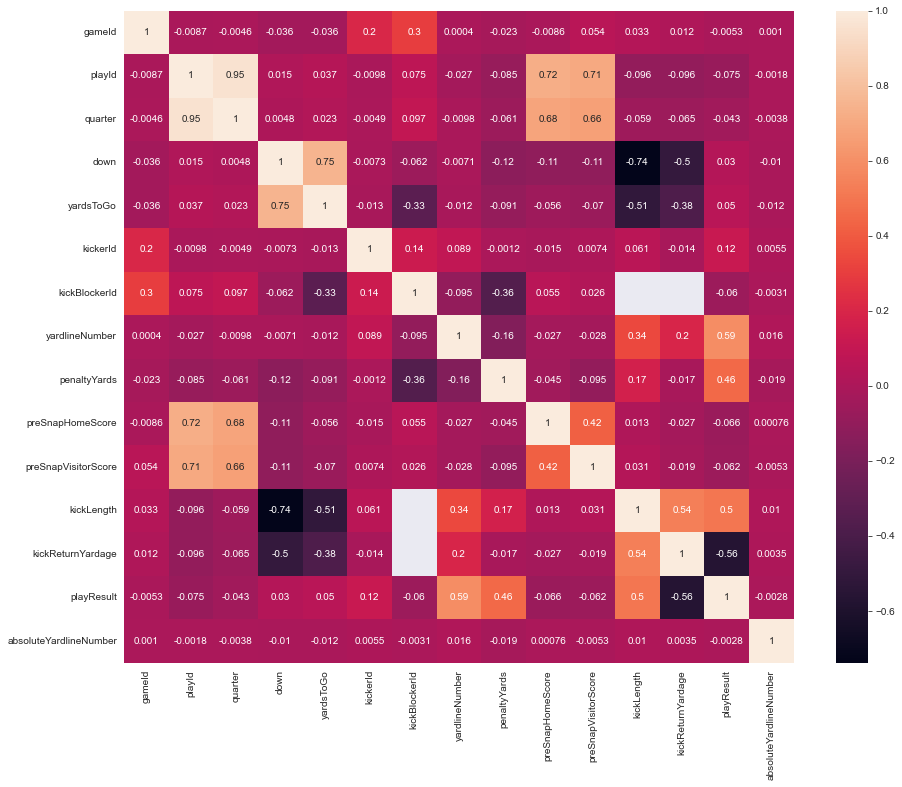

In [24]:
plt.figure(figsize=(15, 12))
sns.heatmap(plays.corr(), annot=True)

In [25]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19979 entries, 0 to 19978
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19979 non-null  int64  
 1   playId                  19979 non-null  int64  
 2   playDescription         19979 non-null  object 
 3   quarter                 19979 non-null  int64  
 4   down                    19979 non-null  int64  
 5   yardsToGo               19979 non-null  int64  
 6   possessionTeam          19979 non-null  object 
 7   specialTeamsPlayType    19979 non-null  object 
 8   specialTeamsResult      19979 non-null  object 
 9   kickerId                19878 non-null  float64
 10  returnerId              6938 non-null   object 
 11  kickBlockerId           100 non-null    float64
 12  yardlineSide            19813 non-null  object 
 13  yardlineNumber          19979 non-null  int64  
 14  gameClock               19979 non-null

In [26]:
plotlybar(plays, "quarter", "Number of Plays every quater")

In [27]:
plotlybar(plays, "down", "Number of Plays every down")

In [28]:
plotlybar(plays, "yardsToGo", "Number of Plays every yardsToGo")

In [29]:
plotlybar(plays, "specialTeamsPlayType", "Number of Playes per specialTeamsPlayType")

In [30]:
plotlybar(plays, "possessionTeam", "Number of Playes per possessionTeam")

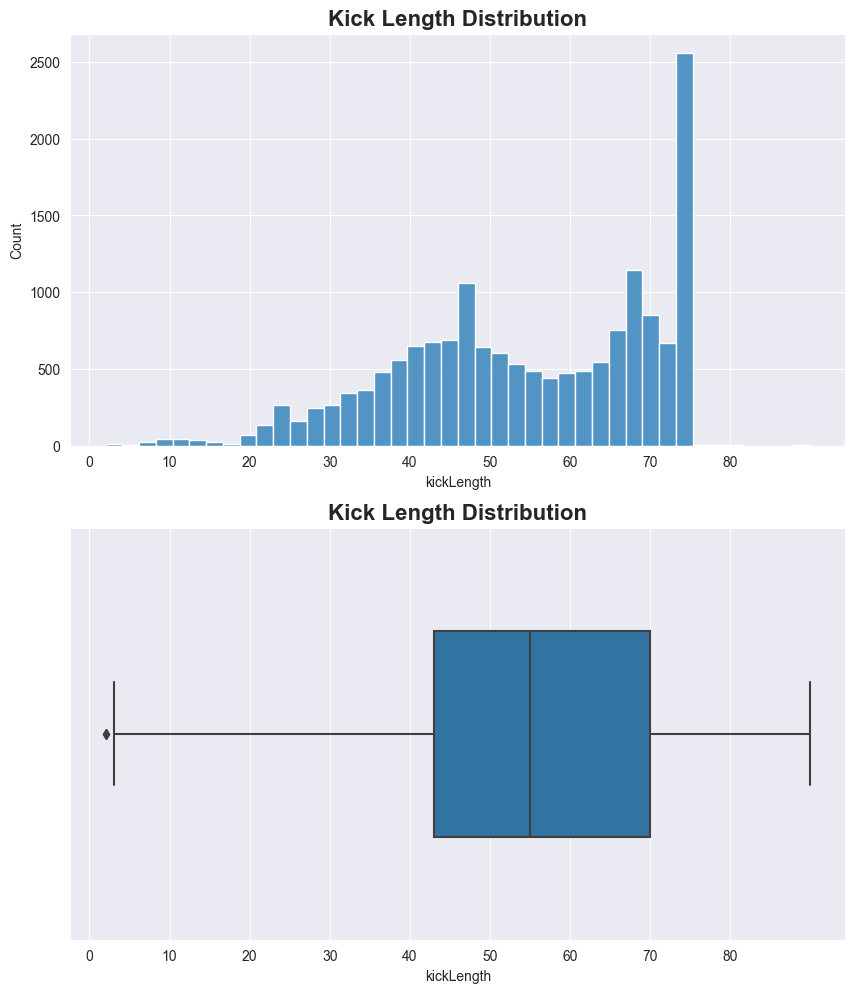

In [31]:
plt.figure(figsize=(10, 12), dpi=100)

ax1 = plt.subplot(211)
sns.histplot(plays.kickLength, ax=ax1)
ax1.set_title("Kick Length Distribution", fontdict=title_font_dict)
ax1.set_xticks(np.arange(0, 85, 10));

ax2 = plt.subplot(212)
sns.boxplot(plays.kickLength, ax=ax2, width=0.5)
ax2.set_title("Kick Length Distribution", fontdict=title_font_dict)
ax2.set_xticks(np.arange(0, 85, 10));

In [32]:
columns = ["quarter", "down", "preSnapHomeScore", "preSnapVisitorScore", "kickReturnYardage", "kickLength", "yardsToGo", "kickBlockerId",
           "yardlineNumber", "penaltyYards", "playResult"]

plays_temp = plays[columns]
plays_temp

,quarter,down,preSnapHomeScore,preSnapVisitorScore,kickReturnYardage,kickLength,yardsToGo,kickBlockerId,yardlineNumber,penaltyYards,playResult
0,1,0,0,0,NaN,66.0,0,NaN,35,NaN,40
1,1,4,0,0,5.0,56.0,4,NaN,8,-15.0,36
2,1,4,0,0,NaN,21.0,3,NaN,3,NaN,0
3,1,0,0,3,30.0,64.0,0,NaN,35,NaN,34
4,1,4,0,3,NaN,65.0,18,NaN,35,NaN,45
...,...,...,...,...,...,...,...,...,...,...,...
19974,4,0,16,19,NaN,75.0,0,NaN,35,NaN,40
19975,4,0,16,25,NaN,NaN,0,NaN,15,NaN,0
19976,4,0,16,26,NaN,75.0,0,NaN,35,NaN,40
19977,4,0,22,26,NaN,NaN,0,NaN,15,NaN,0


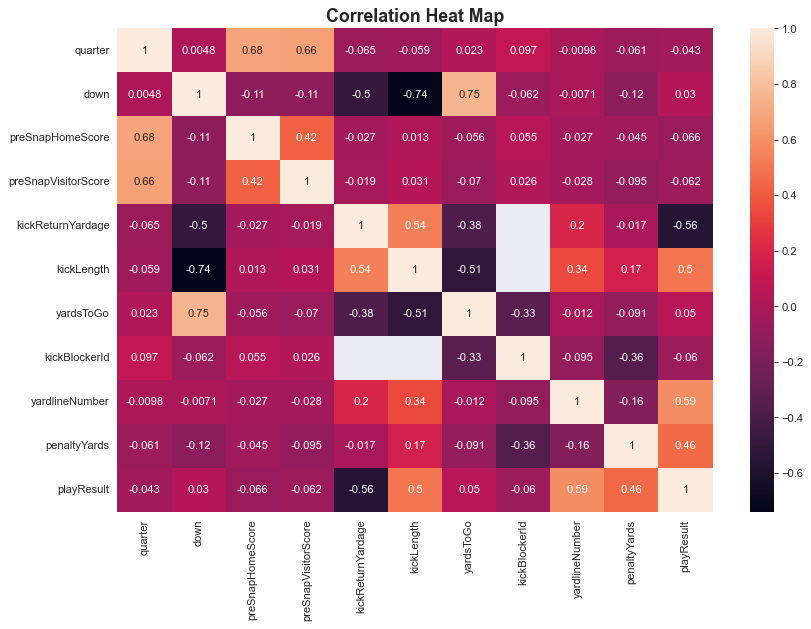

In [33]:
plt.figure(figsize=(12, 8), dpi=80)
sns.heatmap(plays_temp.corr(), annot=True)
plt.title("Correlation Heat Map", fontdict=title_font_dict);

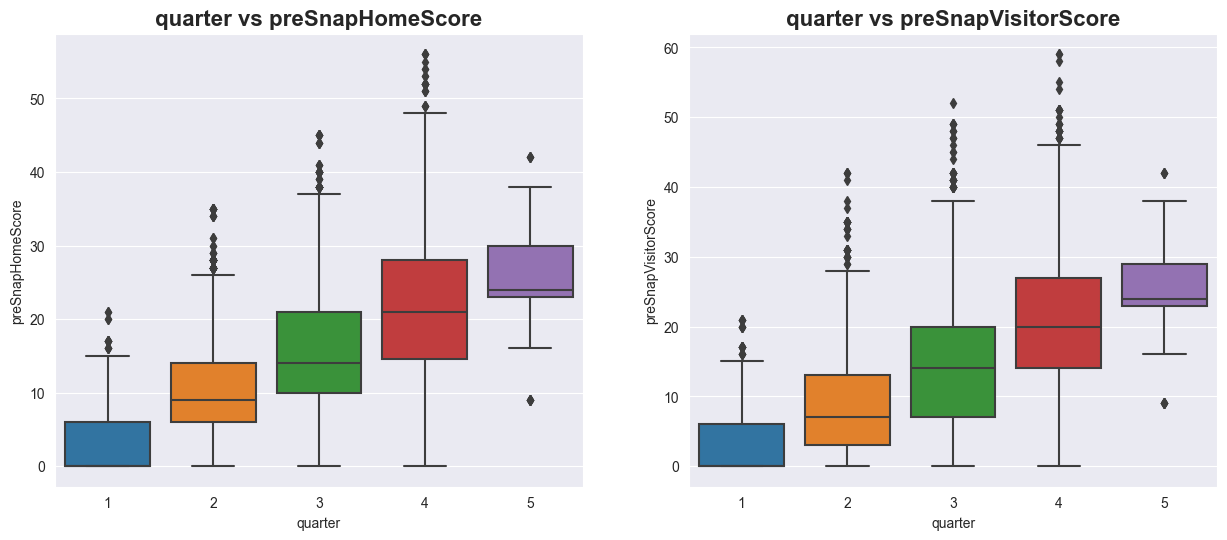

In [34]:
plt.figure(figsize=(15, 6), dpi=100)

ax1 = plt.subplot(121)
sns.boxplot(
    x = plays_temp.quarter,
    y = plays_temp.preSnapHomeScore,
    ax=ax1
)
ax1.set_title("quarter vs preSnapHomeScore", fontdict=title_font_dict)

ax2 = plt.subplot(122)
sns.boxplot(
    x = plays_temp.quarter,
    y = plays_temp.preSnapVisitorScore,
    ax=ax2
)
ax2.set_title("quarter vs preSnapVisitorScore", fontdict=title_font_dict);

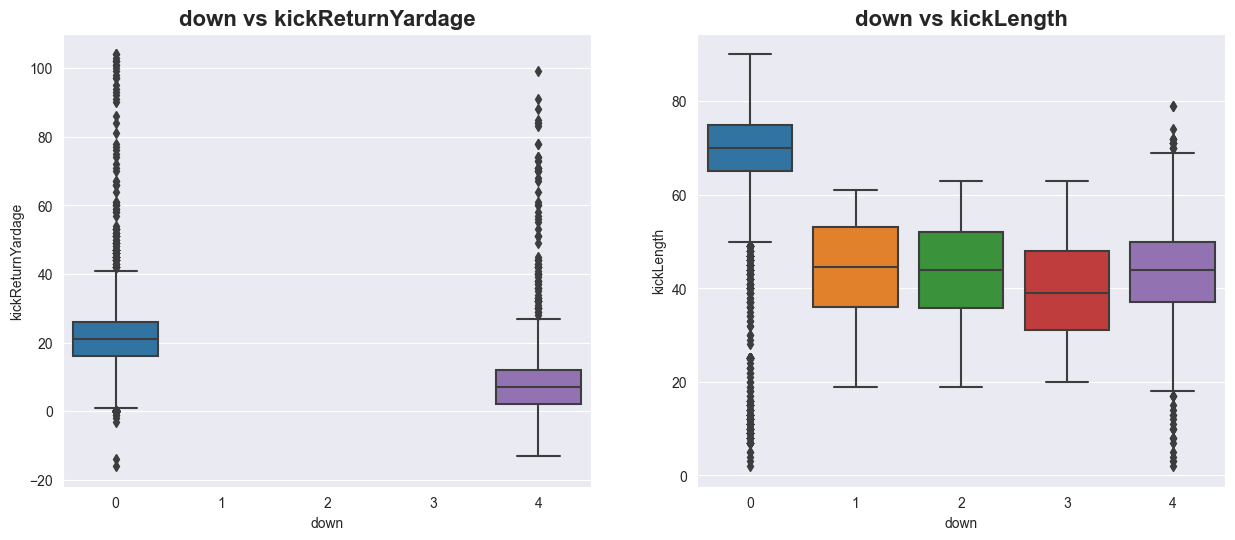

In [35]:
plt.figure(figsize=(15, 6), dpi=100)

ax1 = plt.subplot(121)
sns.boxplot(
    x = plays_temp.down,
    y = plays_temp.kickReturnYardage,
    ax=ax1
)
ax1.set_title("down vs kickReturnYardage", fontdict=title_font_dict)

ax2 = plt.subplot(122)
sns.boxplot(
    x = plays_temp.down,
    y = plays_temp.kickLength,
    ax=ax2
)
ax2.set_title("down vs kickLength", fontdict=title_font_dict);

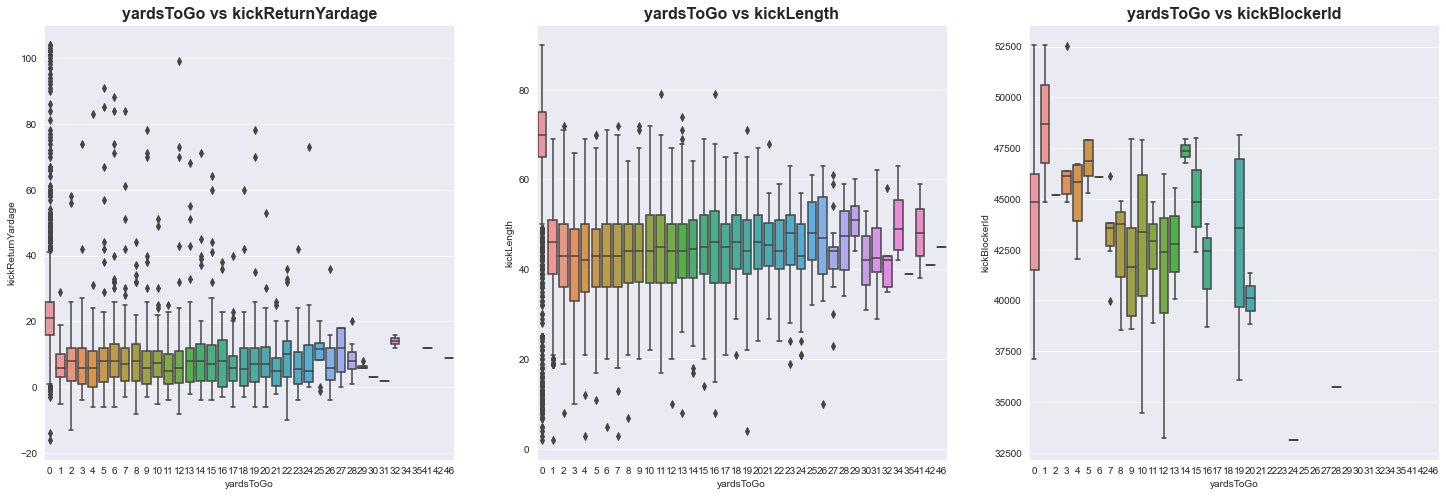

In [36]:
plt.figure(figsize=(25, 8))

ax1 = plt.subplot(131)
sns.boxplot(
    x = plays_temp.yardsToGo,
    y = plays_temp.kickReturnYardage,
    ax=ax1
)
ax1.set_title("yardsToGo vs kickReturnYardage", fontdict=title_font_dict)

ax2 = plt.subplot(132)
sns.boxplot(
    x = plays_temp.yardsToGo,
    y = plays_temp.kickLength,
    ax=ax2
)
ax2.set_title("yardsToGo vs kickLength", fontdict=title_font_dict);

ax3 = plt.subplot(133)
sns.boxplot(
    x = plays_temp.yardsToGo,
    y = plays_temp.kickBlockerId,
    ax=ax3
)
ax3.set_title("yardsToGo vs kickBlockerId", fontdict=title_font_dict);

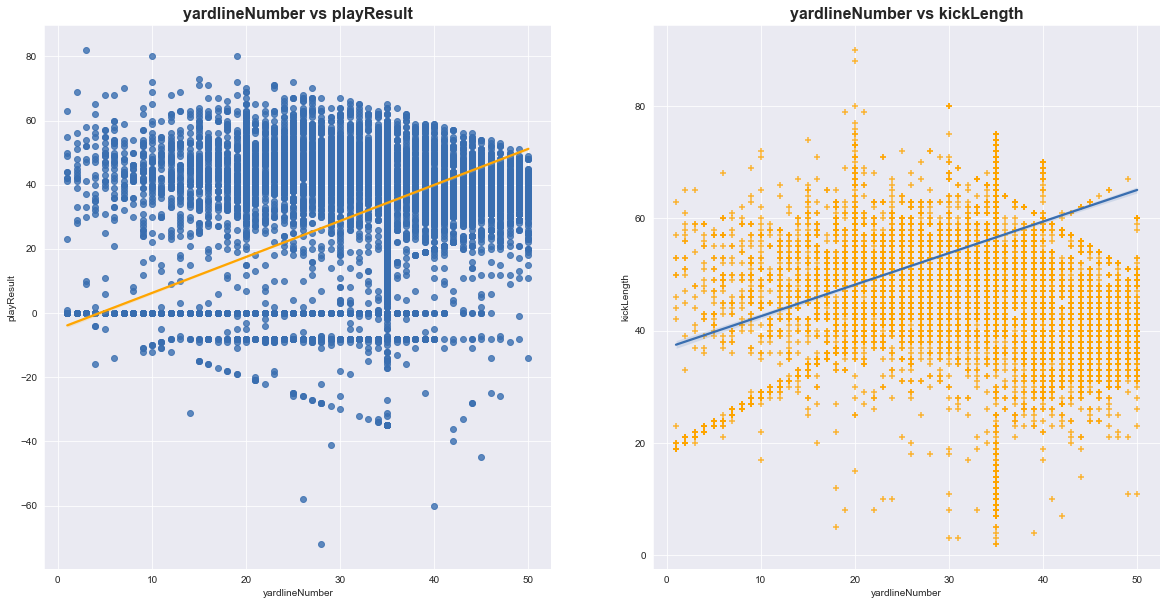

In [37]:
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(121)
sns.regplot(
    x = plays_temp.yardlineNumber,
    y = plays_temp.playResult,
    ax=ax1, line_kws={"color": "orange"}, scatter_kws={"color": "#396EB0"},
)
ax1.set_title("yardlineNumber vs playResult", fontdict=title_font_dict)

ax2 = plt.subplot(122)
sns.regplot(
    x = plays_temp.yardlineNumber,
    y = plays_temp.kickLength,
    ax=ax2, line_kws={"color": "#396EB0"}, scatter_kws={"color": "orange"},
    marker="+"
)
ax2.set_title("yardlineNumber vs kickLength", fontdict=title_font_dict);

In [38]:
plays_temp.columns

Index(['quarter', 'down', 'preSnapHomeScore', 'preSnapVisitorScore',
       'kickReturnYardage', 'kickLength', 'yardsToGo', 'kickBlockerId',
       'yardlineNumber', 'penaltyYards', 'playResult'],
      dtype='object')

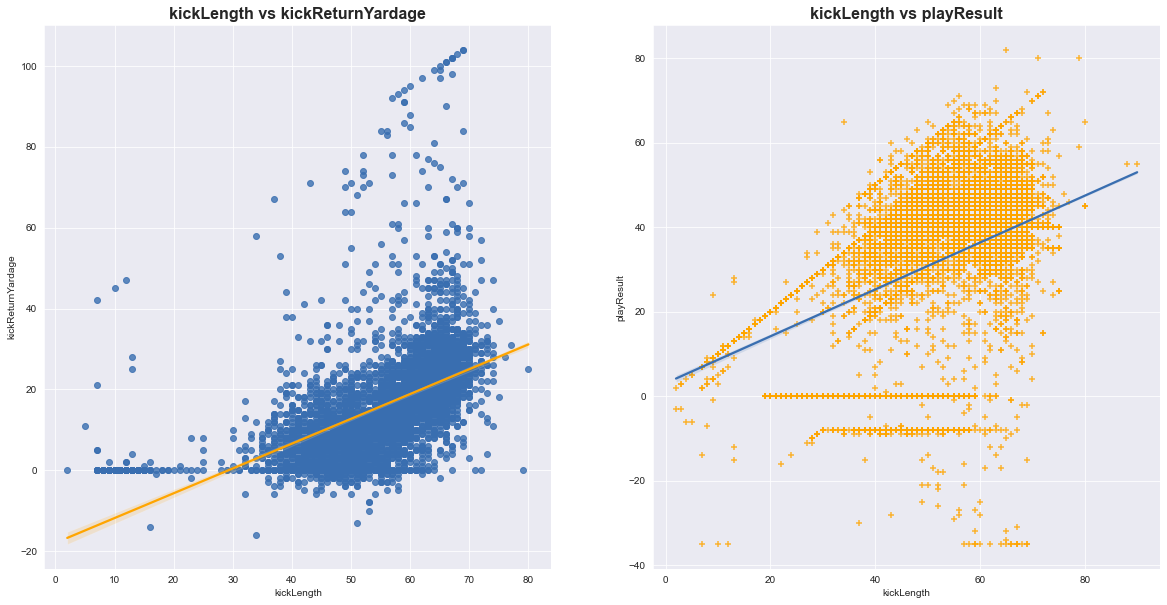

In [39]:
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(121)
sns.regplot(
    x = plays_temp.kickLength,
    y = plays_temp.kickReturnYardage,
    ax=ax1, line_kws={"color": "orange"}, scatter_kws={"color": "#396EB0"},
)
ax1.set_title("kickLength vs kickReturnYardage", fontdict=title_font_dict)

ax2 = plt.subplot(122)
sns.regplot(
    x = plays_temp.kickLength,
    y = plays_temp.playResult,
    ax=ax2, line_kws={"color": "#396EB0"}, scatter_kws={"color": "orange"},
    marker="+"
)
ax2.set_title("kickLength vs playResult", fontdict=title_font_dict);

# <center>4. Tracking Data</center>

In [40]:
tracking2020 = pd.read_csv('./datasets/tracking2020.csv')
tracking2020.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2021-01-03T18:03:02.200,61.21,46.77,0.08,0.13,0.01,186.21,144.73,None,42901.0,Dean Marlowe,31.0,SS,home,1,2021010300,40,left
1,2021-01-03T18:03:02.300,61.22,46.77,0.11,0.19,0.01,184.87,126.09,None,42901.0,Dean Marlowe,31.0,SS,home,2,2021010300,40,left
2,2021-01-03T18:03:02.400,61.23,46.76,0.10,0.18,0.01,183.38,108.95,None,42901.0,Dean Marlowe,31.0,SS,home,3,2021010300,40,left
3,2021-01-03T18:03:02.500,61.24,46.76,0.11,0.22,0.01,180.24,91.57,None,42901.0,Dean Marlowe,31.0,SS,home,4,2021010300,40,left
4,2021-01-03T18:03:02.600,61.25,46.76,0.05,0.20,0.01,172.44,119.91,None,42901.0,Dean Marlowe,31.0,SS,home,5,2021010300,40,left


In [42]:
def plot_tracking_data(gameId, playId=False, position=False):
    team_names = ["home", "away", "football"]
    colors = ["#396EB0", "#34BE82", "red"]
    
    if playId:
        temp_tracking_df = tracking2020.query(f'gameId == {gameId} and playId == {playId}')
        teams = 3
    elif position:
        temp_tracking_df = tracking2020.query(f'gameId == {gameId} and position == "{position}"')
        teams = 2
        
    fig = go.Figure()
    
    for i in range (teams):
        fig.add_trace(go.Scatter(
            x = temp_tracking_df.query(f"team == '{team_names[i]}'").x,
            y = temp_tracking_df.query(f"team == '{team_names[i]}'").y,
            mode = "markers",
            marker=dict(color=colors[i])
        ))
    fig.update_layout(
        width=1000,
        height=600,
        title=f"<b>Tracking Data - gameId = {gameId} and playId = {playId}</b>",
        xaxis_title="x",
        yaxis_title="y",
        showlegend=False
    )
    fig.show()

In [43]:
plot_tracking_data(gameId=2020092707, playId=1186)

In [44]:
plot_tracking_data(gameId=2020102600, playId=250)

In [45]:
plot_tracking_data(gameId=2021010307, playId=2460)

In [46]:
temp_tracking_df = tracking2020.query(f'gameId == 2021010307 and position == "RB"')


In [47]:
plot_tracking_data(gameId=2020102508, position="CB")

In [48]:
plot_tracking_data(gameId=2020101112, position="LB")

In [49]:
plot_tracking_data(gameId=2020102507, position="RB")

### Animating Tracking Data using Plotly

In [50]:
import base64

#set a local image as a background
image_filename = 'field.png'
plotly_logo = base64.b64encode(open(image_filename, 'rb').read())

def animated_game(gameId, playId, speed):
    temp_tracking_df = tracking2020[tracking2020['gameId'] == gameId]

    temp_tracking_query = (tracking2020['gameId'] == gameId) & (tracking2020['playId'] == playId)

    temp_tracking_df = (
        tracking2020[temp_tracking_query][['x', 'y', 'time', 'nflId', 'team', 'displayName']]
        .fillna(0.)
        .sort_values(['team', 'time'])
    )

    fig = px.scatter(
        temp_tracking_df,
        x='x',
        y='y',
        animation_frame='time',
        color='team',
        animation_group="nflId",
        hover_name="displayName"
    )
    fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),
                      selector=dict(mode='markers'))
    fig.update_layout(
        template="plotly_white",
        autosize=False,
        width=1000,
        height=600,
        title=f'Animation Every Players in the play {playId} of Game {gameId}',
        images= [dict(source='data:image/png;base64,{}'.format(plotly_logo.decode()),
                      xref="paper", yref="paper",x=0, y=1, sizex=1, sizey=1,
                      layer="below", opacity=0.5)],
        xaxis=dict(showgrid=False),
        yaxis=dict(showgrid=False)
    )
    fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = speed
    fig.show()

In [51]:
gameId = 2021010300
playId = 40
speed = 60

animated_game(gameId, playId, speed)

In [52]:
gameId = 2020111510
playId = 1987
speed = 60

animated_game(gameId, playId, speed)

In [53]:
gameId = 2020121302
playId = 1320
speed = 60

animated_game(gameId, playId, speed)